# Predicting the bulldozer sales price using machine learning 

In this notebook, i am going to be working with a data set with the objective of predicting the sales price of bulldozers 

## Problem definition 
How well can we predict the sales price of a bulldozer given his characteristics and previous similar bulldozers sold ?

## Data 
The data is download from kaggle.

Train.csv is the training set, which contains data through the end of 2011.

Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

The goal for most regression evaluation metrics is to minimize the error. The goal for this project is to create a model which minimize RMSLE

## Features 
I have a dictionary that provides the details of the features in the files 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
## Import training and validation sets 
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
# We can see that most of the data is object type, so we either have to consider with the data is relevant (transform it to numeric) or if not to delete

In [4]:
df.isnull().sum() ## missing values

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
##There are a lot of missing values, i will handle them shortly 

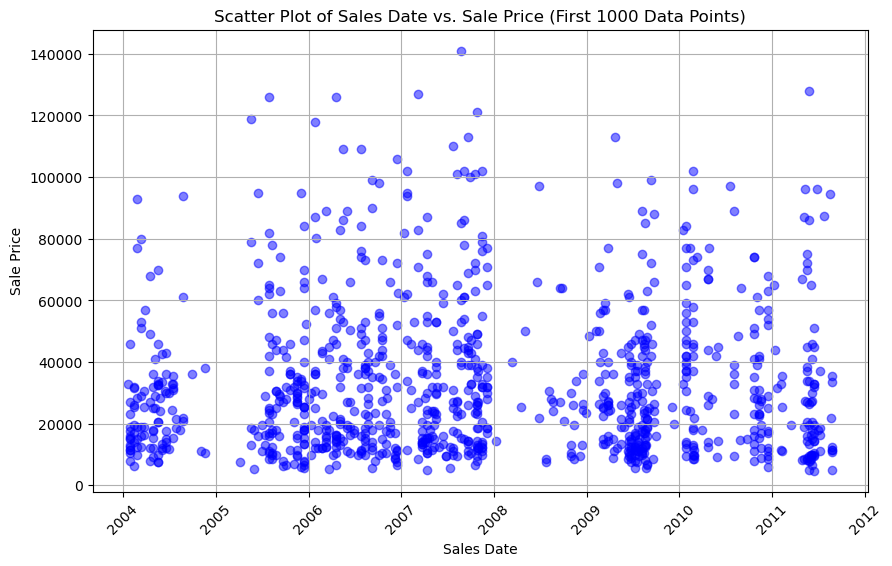

In [6]:
# Convert SalesDate to datetime format
df["saledate"] = pd.to_datetime(df["saledate"])

# Select first 1000 rows
df_sample = df.head(1000)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sample["saledate"], df_sample["SalePrice"], alpha=0.5, color="blue")

# Labels and title
plt.xlabel("Sales Date")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Sales Date vs. Sale Price (First 1000 Data Points)")
plt.xticks(rotation=45)  # Rotate dates for readability
plt.grid(True)

# Show plot
plt.show()

In [7]:
# plotting the saledate vs the sales price to understand the data deeper

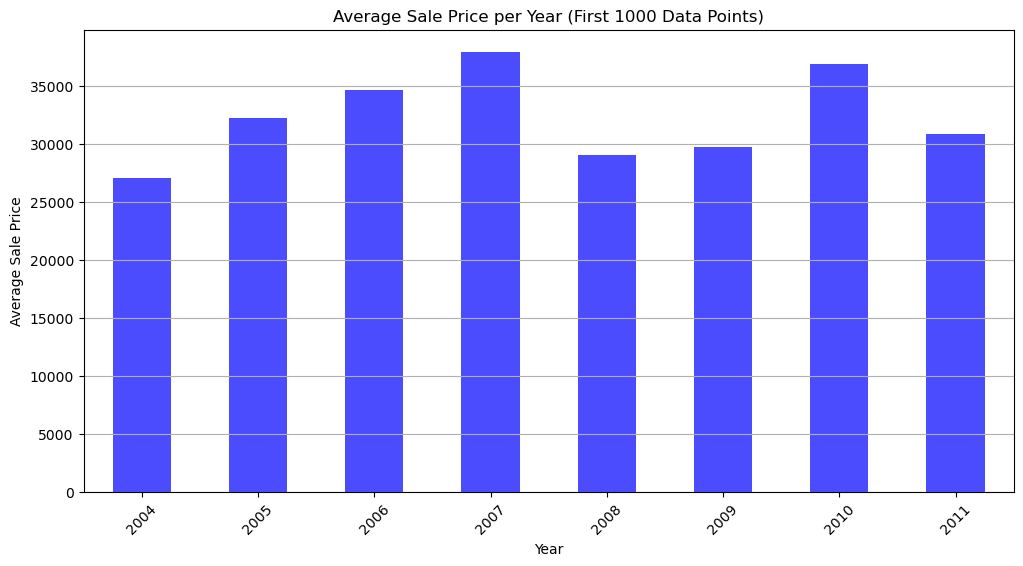

In [8]:
# Convert SalesDate to datetime format
df["saledate"] = pd.to_datetime(df["saledate"])

# Select first 1000 rows and create a safe copy
df_sample = df.head(1000).copy()

# Extract year from SalesDate
df_sample["sale_year"] = df_sample["saledate"].dt.year

# Group by year and calculate average sale price
df_grouped = df_sample.groupby("sale_year")["SalePrice"].mean()

# Create bar chart
plt.figure(figsize=(12, 6))
df_grouped.plot(kind="bar", color="blue", alpha=0.7)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price per Year (First 1000 Data Points)")
plt.xticks(rotation=45)  # Rotate years for readability
plt.grid(axis='y')

# Show plot
plt.show()


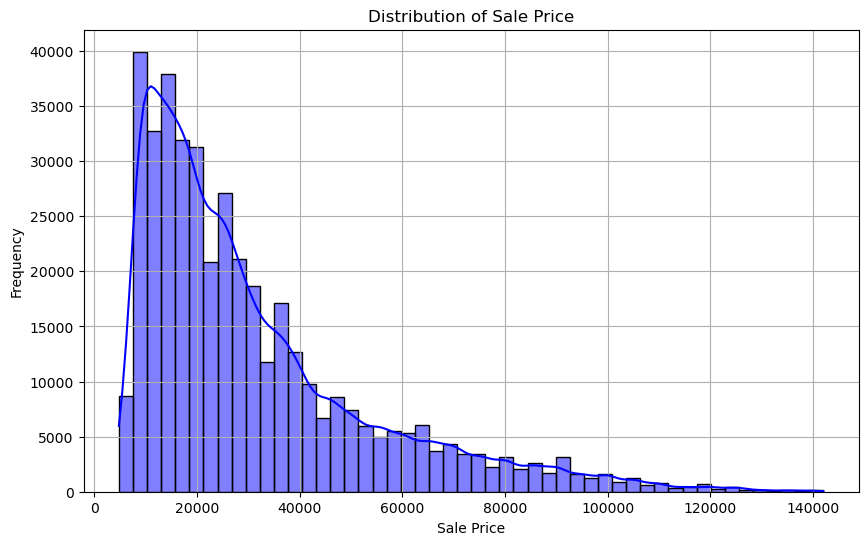

In [9]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], bins=50, kde=True, color="blue")

# Labels and title
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.grid(True)

# Show plot
plt.show()

In [10]:
#This graphic show us that around 75% of the sales moves between 20,000 - 40,000 dollars 

In [11]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   

In [13]:
## Sort data by saledate 

#when working with time series is a good idda to sort it by date to have it organized 

df.sort_values(by="saledate", inplace=True,  ascending=True)


In [14]:
df.saledate 

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [15]:
# let make a copy of the original dataframe
df_tmp = df.copy()

In [16]:
df_tmp.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [17]:
## it is a good idea to add or enrich some data such as the saledate, so i will add more columns derived from the saledate column 

# Add new columns efficiently
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek  # Monday=0, Sunday=6
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear


In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
## now we have the info about saledate, let delete the saledate column 

df_tmp.drop(columns=["saledate"], inplace=True)


In [20]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [22]:
df_tmp.isnull().sum() ## missing values

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# convert string into categories 
### one way we can turn all are data into numbers is converting them into pandas categories

In [23]:
# i created a function that return which columns contains strings 

import pandas as pd

def get_object_columns(df_tmp):
    """
    Identifies all object-type columns in df_tmp.
    
    Parameters:
        df_tmp (pd.DataFrame): The input DataFrame.
    
    Returns:
        list: A list of column names with dtype 'object'.
    """
    return df_tmp.select_dtypes(include=["object"]).columns.tolist()

# Example usage
object_cols = get_object_columns(df_tmp)
print("Object-type columns:", object_cols)



Object-type columns: ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


In [24]:
object_cols = get_object_columns(df_tmp)  # Get list of object-type columns
num_object_columns = len(object_cols)  # Count the number of columns

print(f"Total object-type columns: {num_object_columns}")


Total object-type columns: 44


In [25]:
## now that i have identify the columns that contains strings or have the object dat type, now lets convert them into categories 

# Convert all object-type columns to categorical
df_tmp[df_tmp.select_dtypes(include=["object"]).columns] = df_tmp.select_dtypes(include=["object"]).astype("category")


In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [27]:
# Loop through all categorical columns and display their categories
for col in df_tmp.select_dtypes(include=["category"]).columns:
    print(f"Categories for '{col}':")
    print(df_tmp[col].cat.categories)  # Shows unique categorical values
    print("-" * 40)  # Separator for readability



Categories for 'UsageBand':
Index(['High', 'Low', 'Medium'], dtype='object')
----------------------------------------
Categories for 'fiModelDesc':
Index(['100C', '104', '1066', '1066E', '1080', '1080B', '1088', '1088CK',
       '1088LT', '1088TTL',
       ...
       'ZX600LC', 'ZX70', 'ZX75', 'ZX75US', 'ZX75USA', 'ZX80', 'ZX800',
       'ZX800LC', 'ZX80LCK', 'ZX850H'],
      dtype='object', length=5059)
----------------------------------------
Categories for 'fiBaseModel':
Index(['10', '100', '104', '1066', '1080', '1088', '10DG', '11', '110', '1105',
       ...
       'ZX370', 'ZX450', 'ZX460', 'ZX50', 'ZX600', 'ZX70', 'ZX75', 'ZX80',
       'ZX800', 'ZX850'],
      dtype='object', length=1961)
----------------------------------------
Categories for 'fiSecondaryDesc':
Index([' MSR SPIN ACE', '#NAME?', '-2', '-3', '-5', '-5L', '-6', '-7', '0.7',
       '1',
       ...
       'XP', 'XT', 'Z', 'ZF', 'ZHS', 'ZHS G', 'ZT', 'ZTM', 'ZTS', 'ZX'],
      dtype='object', length=177)
-----------

In [28]:
# Display category codes for all categorical columns
for col in df_tmp.select_dtypes(include=["category"]).columns:
    print(f"Category codes for '{col}':")
    print(df_tmp[col].cat.codes.head())  # Shows first 5 encoded values
    print("-" * 40)



Category codes for 'UsageBand':
205615   -1
274835   -1
141296   -1
212552   -1
62755    -1
dtype: int8
----------------------------------------
Category codes for 'fiModelDesc':
205615    4592
274835    1819
141296    2347
212552    1818
62755     2118
dtype: int16
----------------------------------------
Category codes for 'fiBaseModel':
205615    1743
274835     558
141296     712
212552     557
62755      682
dtype: int16
----------------------------------------
Category codes for 'fiSecondaryDesc':
205615    -1
274835    -1
141296    58
212552    -1
62755     20
dtype: int16
----------------------------------------
Category codes for 'fiModelSeries':
205615   -1
274835   -1
141296   -1
212552   -1
62755    -1
dtype: int8
----------------------------------------
Category codes for 'fiModelDescriptor':
205615   -1
274835   -1
141296   -1
212552   -1
62755    -1
dtype: int16
----------------------------------------
Category codes for 'ProductSize':
205615    3
274835   -1
141296    1

In [33]:
## % missing values per variable 

missing_percentages = round(df_tmp.isnull().sum() / len(df_tmp) * 100, 2)
print(missing_percentages)


SalesID                      0.00
SalePrice                    0.00
MachineID                    0.00
ModelID                      0.00
datasource                   0.00
auctioneerID                 4.88
YearMade                     0.00
MachineHoursCurrentMeter    64.26
UsageBand                   82.15
fiModelDesc                  0.00
fiBaseModel                  0.00
fiSecondaryDesc             34.10
fiModelSeries               85.78
fiModelDescriptor           81.87
ProductSize                 52.49
fiProductClassDesc           0.00
state                        0.00
ProductGroup                 0.00
ProductGroupDesc             0.00
Drive_System                74.05
Enclosure                    0.08
Forks                       52.09
Pad_Type                    80.35
Ride_Control                62.99
Stick                       80.35
Transmission                54.44
Turbocharged                80.35
Blade_Extension             93.70
Blade_Width                 93.70
Enclosure_Type

In [34]:
# the next step is to fill the missing values 

# but first let save it to a new csv so we do not have to run it from beginning 

## save preprocess data

In [35]:
# export current df_tmp
df_tmp.to_csv('data/bluebook-for-bulldozers/version1_train_tmp.csv', index=False)


In [37]:
#import preprocess data 

df_tmp = pd.read_csv('data/bluebook-for-bulldozers/version1_train_tmp.csv', low_memory=False)


In [40]:
df_tmp.isnull().sum() ## missing values to work with them 

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill numeric missing values 

In [42]:
df_tmp.select_dtypes(include=['number']).columns


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype='object')

In [43]:
## Let work first on completeing the missing numeric columns

df_tmp.select_dtypes(include=['number']).isnull().sum()


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
saleYear                         0
saleMonth                        0
saleDay                          0
saleDayOfWeek                    0
saleDayOfYear                    0
dtype: int64

In [51]:
# Each unique value 
df_tmp.auctioneerID.unique()


array([18., 99.,  4.,  1.,  6., 24., 19., 10.,  2., 23., 11., 15., 25.,
       16., 13., 14.,  7., 21.,  5., 12., 28., 20., 22.,  9., 17.,  3.,
        8., nan, 27., 26.,  0.])

In [52]:
# how frequent each value appear 
df_tmp.auctioneerID.value_counts()


auctioneerID
1.0     192773
2.0      57441
3.0      30288
4.0      20877
99.0     12042
6.0      11950
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3823
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        536
Name: count, dtype: int64

In [53]:
## let add at the end of the table a binary column to identify which variable had missing values regarless of numeric or not, 
# is o keep track to which one was missing values, add a 0 to those who do not missed vales and a 1 to those who missed

df_tmp['missing_flag'] = df_tmp.isnull().any(axis=1).astype(int)


In [56]:
#Let complete the missing values of the column auctioneerID  with the median values of auctioneerID

df_tmp['auctioneerID'].fillna(df_tmp['auctioneerID'].median(), inplace=True)


In [58]:
#testing if it has o nor missing values 
df_tmp['auctioneerID'].isnull().sum()


np.int64(0)

In [59]:
# let see how many column are missing values

df_tmp.isnull().sum() ## missing values to work with them 

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [64]:
#completting missing values with median for MachineHoursCurrentMeter
df_tmp.loc[:, 'MachineHoursCurrentMeter'] = df_tmp['MachineHoursCurrentMeter'].fillna(df_tmp['MachineHoursCurrentMeter'].median())


In [63]:
df_tmp.isnull().sum() ## missing values to work with them 

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         